<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Defri**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-warning">
    
# General feedback v.1 [Minor Improvement Needed]

Terima kasih banyak telah mengirimkan proyek Anda! 

Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Namun saya telah menemukan beberapa hal kecil yang bisa menjadi saran perbaikan agar proyek kamu menjadi lebih baik lagi.

Saya telah meninggalkan komentar yang dapat membantu Anda dalam hal tersebut. Hal ini tidak berarti bahwa Anda telah melakukan sesuatu yang salah. Hal ini hanya berisi beberapa saran tentang bagaimana pekerjaan Anda dapat kembangkan lebih lanjut. Anda masih memiliki kesempatan untuk memperbaikinya dan jangan lupa untuk kembali kepada saya setelah perbaikan anda selesai.

<br>
Jika ada sesuatu yang membuat Anda bingung atau tidak mengerti. Tolong, jangan ragu untuk menghubungi tim mentor atau instruktur kamu yaa

kamu juga bisa menghubungi saya melalui reply feedback di notebook ini yaa

**TETAP SEMANGAT!!**
    
</div>

# SQL

Virus corona yang kehadirannya mengejutkan seluruh dunia telah mengubah rutinitas harian semua orang.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀢󠀳󠀰 Kini, warga kota tidak lagi menghabiskan waktu luangnya di luar rumah seperti pergi ke kafe dan mal. Mereka lebih sering berada di rumah, menghabiskan waktunya dengan membaca buku.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀣󠀳󠀰 Hal ini pun mendorong perusahaan startup untuk mengembangkan aplikasi baru bagi para pecinta buku.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀤󠀳

󠀰Kamu telah diberi sebuah database dari salah satu perusahaan yang bersaing dalam industri ini.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀥󠀳󠀰 Database tersebut berisi data tentang buku, penerbit, penulis, serta rating dan ulasan pelanggan atas buku terkait.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀦󠀳󠀰 Informasi ini akan digunakan dalam membuat penawaran harga untuk sebuah produk baru.

Tujuan : Mengidentifikasi profil buku penjualan berdasarkan review dan rating dari pelanggan dalam membuat penawaran harga untuk sebuah produk baru.

## Deskripsi Data

Dataframe `df_books` memuat:
   - `book_id` — ID buku
   - `author_id` — ID penulis
   - `title` — Judul buku
   - `num_pages` — Jumlah halaman
   - `publication_date` — Tanggal penerbitan
   - `publisher_id` — ID penerbit
   
Dataframe `df_authors` memuat:
   - `author_id` — ID penulis
   - `author` — Nama penulis
   
Dataframe `df_publishers` memuat:
   - `publisher_id` — ID penerbit
   - `publisher` — Nama penerbit

Dataframe `df_ratings` memuat:
   - `rating_id` — ID rating
   - `book_id` — ID buku
   - `username` — Nama pengguna yang memberi rating buku
   - `rating` — ID buku

Dataframe `df_reviews` memuat:
   - `review_id` — ID ulasan
   - `book_id` — ID buku
   - `username` — Nama pengguna yang mengulas buku
   - `text` — Teks ulasan

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Read Connection From PSQL DB

get data dari database melalui SQL

In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs',
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': '6432',
             'db': 'data-analyst-final-project-db'}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
query_1 = """SELECT * FROM public.books;"""
query_2 = """SELECT * FROM public.authors;"""
query_3 = """SELECT * FROM public.publishers;"""
query_4 = """SELECT * FROM public.ratings;"""
query_5 = """SELECT * FROM public.reviews;"""

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Inisialisasi Libray

Import library untuk visualisasi

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Memuat data

In [4]:
df_books = pd.io.sql.read_sql(query_1, con = engine)
df_authors = pd.io.sql.read_sql(query_2, con = engine)
df_publishers = pd.io.sql.read_sql(query_3, con = engine)
df_ratings = pd.io.sql.read_sql(query_4, con = engine)
df_reviews = pd.io.sql.read_sql(query_5, con = engine)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Mengenal Data

### Books

In [5]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [6]:
df_books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [7]:
df_books.duplicated().sum()

0

In [8]:
df_books.isnull().sum()

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Sekarang jelaskan temuanmu disini

</div>

### Authors

In [9]:
df_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
df_authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [11]:
df_authors.duplicated().sum()

0

In [12]:
df_authors.isnull().sum()

author_id    0
author       0
dtype: int64

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Sekarang jelaskan temuanmu disini

</div>

### Publishers

In [13]:
df_publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [14]:
df_publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [15]:
df_publishers.duplicated().sum()

0

In [16]:
df_publishers.isnull().sum()

publisher_id    0
publisher       0
dtype: int64

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Sekarang jelaskan temuanmu disini

</div>

### Ratings

In [17]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [18]:
df_ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [19]:
df_ratings.duplicated().sum()

0

In [20]:
df_ratings.isnull().sum()

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Sekarang jelaskan temuanmu disini

</div>

### Reviews

In [21]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [22]:
df_reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [23]:
df_reviews.duplicated().sum()

0

In [24]:
df_reviews.isnull().sum()

review_id    0
book_id      0
username     0
text         0
dtype: int64

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Sekarang jelaskan temuanmu disini

</div>

## Menganalisis Data

### Hitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000

Mengambil data melalui query SQL untuk dataset books dimana tanggal rilis setelah 1 Januari 2000

In [25]:
query = """
SELECT *
FROM public.books 
WHERE publication_date > '2000-01-01';"""

In [26]:
books = pd.io.sql.read_sql(query, con = engine)

In [27]:
books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
814,994,408,World War Z: An Oral History of the Zombie War,342,2006-09-12,68
815,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
816,998,201,Year of Wonders,358,2002-04-30,212
817,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [28]:
len(books)

819

Terdapat sejumlah 819 buku

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

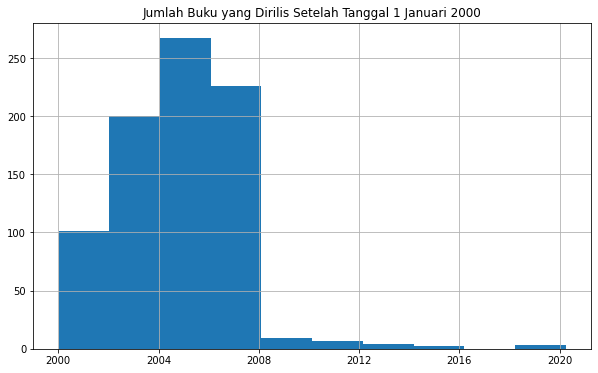

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Jumlah Buku yang Dirilis Setelah Tanggal 1 Januari 2000')
books['publication_date'].hist(bins=10)
plt.show()

Jumlah buku rilis:
- Terlihat paling banyak buku dirilis pada tahun 2000 - 2008, pada tahun 2005 dengan total rilis kisaran 270 buku.
- Tiba-tiba terjadi penurunan yang ekstrem setelah tahun 2008 hingga tahun 2020

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Hitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀠

Mengambil data pada dataset review yang di join dengan rating untuk mencari tahu jumlah ulasan dan nilai rata-rata ratingnya.

In [30]:
query = """
SELECT 
    reviews.book_id
    , COUNT(reviews.review_id) AS count_reviews
    , AVG(subkueri.rating) AS mean_ratings
FROM 
    reviews
    INNER JOIN (SELECT
        rating
        , book_id
    FROM
        ratings) AS subkueri ON subkueri.book_id = reviews.book_id
GROUP BY reviews.book_id;"""

In [31]:
reviews_rating = pd.io.sql.read_sql(query, con = engine).sort_values(by='book_id').reset_index()
reviews_rating.drop(columns='index')

,book_id,count_reviews,mean_ratings
0,1,6,3.666667
1,2,2,2.500000
2,3,9,4.666667
3,4,4,4.500000
4,5,24,4.000000
...,...,...,...
989,996,9,3.666667
990,997,15,3.400000
991,998,20,3.200000
992,999,4,4.500000


Setiap buku memiliki nilai ulasan yang beragam ada yang bernilai satuan hingga puluhan. Sedangkan pada nilai rata-ratanya rating perbedaannya tidak terpaut jauh untuk setiap bukunya.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [32]:
query = """
SELECT 
    COUNT(reviews.review_id) AS count_reviews_total
    , AVG(subkueri.rating) AS mean_ratings_total
FROM 
    reviews
    INNER JOIN (SELECT
        rating
        , book_id
    FROM
        ratings) AS subkueri ON subkueri.book_id = reviews.book_id;"""

In [33]:
pd.io.sql.read_sql(query, con = engine)

,count_reviews_total,mean_ratings_total
0,26167,3.936791


Secara keseluruhan nilai ulasan sebanyak 26167 dan rata-rata ratingnya adalah 3.9

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Query kurang tepat disini kamu seharusnya menampilkan data terurut sesuai dengan jumlah review dan rerata rating 
    
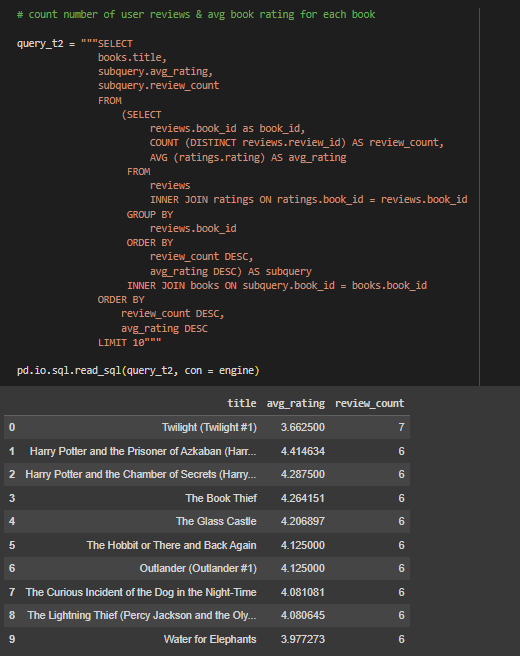

</div>

### Identifikasi penerbit yang telah menerbitkan jumlah buku terbanyak dengan jumlah halaman lebih dari 50 (hal ini akan membantumu dalam mengecualikan brosur dan publikasi serupa dari analisismu)

Pertama kita ambil data dari books untuk kita iris datanya berdasarkan 50 lebih jumlah halaman bukunya, lalu kita join dengan dataset publisher untuk mencari tahu jumlah penerbit terbanyak.

In [34]:
query = """
SELECT 
    DISTINCT(publishers.publisher) AS publisher
    , COUNT(subquery.publisher_id)
FROM 
    publishers
    RIGHT JOIN (SELECT *
                FROM books
                WHERE num_pages > 50) AS subquery ON subquery.publisher_id = publishers.publisher_id
GROUP BY publishers.publisher
ORDER BY
    COUNT(subquery.publisher_id) DESC
LIMIT 10;"""

In [35]:
count_publisher = pd.io.sql.read_sql(query, con = engine)
count_publisher

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,Berkley Books,14
8,St. Martin's Press,14
9,Delta,13


In [36]:
query = """
SELECT 
    DISTINCT(publishers.publisher) AS publisher
    , COUNT(subquery.publisher_id)
FROM 
    publishers
    RIGHT JOIN (SELECT *
                FROM books
                WHERE num_pages < 50) AS subquery ON subquery.publisher_id = publishers.publisher_id
GROUP BY publishers.publisher
ORDER BY
    COUNT(subquery.publisher_id) DESC;"""

In [37]:
pd.io.sql.read_sql(query, con = engine)

,publisher,count
0,Atheneum Books for Young Readers,1
1,Brilliance Audio,1
2,Dover Publications,1
3,Golden Books,1
4,Golden/Disney,1
5,HarperCollins,1
6,Simon & Schuster Childrens Books,1
7,Tanglewood,1


Sepertinya buku yang memiliki jumlah halaman kurang dari 50 hanya 8 buku saja.

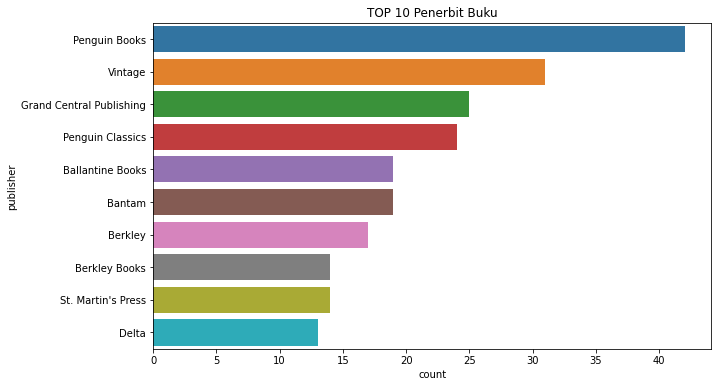

In [38]:
plt.figure(figsize=(10, 6))
plt.title('TOP 10 Penerbit Buku')
sns.barplot(data=count_publisher, x='count', y='publisher')
plt.show()

TOP 10 Penerbit Buku:
- Penguin Books merupakan penerbit paling banyak dengan berjumlahkan 42 terbitan
- Penerbit peringkat ke-10 ada  Delta dengan 13 terbitan buku

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Identifikasi penulis dengan rating rata-rata buku tertinggi: temukan buku dengan rating minimal 50.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀢󠀳

Kita query berdasarkan books untuk dataset authors dan ratings guna mencari titik tengah bertemunya dataset untuk di analisis. Lalu kita iris nilainya berdasarkan hasil penjumlahan rating yang lebih dari 50 rating.

In [39]:
query = """
SELECT 
    authors.author
    , SUM(ratings.rating) AS rating
FROM 
    books
    INNER JOIN authors ON authors.author_id = books.author_id
    INNER JOIN ratings ON ratings.book_id = books.book_id
GROUP BY authors.author
HAVING SUM(ratings.rating) > 50
ORDER BY rating
LIMIT 10;"""

In [40]:
author_rating = pd.io.sql.read_sql(query, con = engine)
author_rating

,author,rating
0,Betty Smith,51
1,Art Spiegelman,52
2,Shel Silverstein,53
3,Gail Carson Levine,53
4,Haruki Murakami/Philip Gabriel,53
5,Cornelia Funke/Anthea Bell,54
6,Kazuo Ishiguro,55
7,Lewis Carroll/Jane Carruth/Rene Cloke,55
8,Lewis Carroll/John Tenniel/Martin Gardner,56
9,Erik Larson/Tony Goldwyn,56


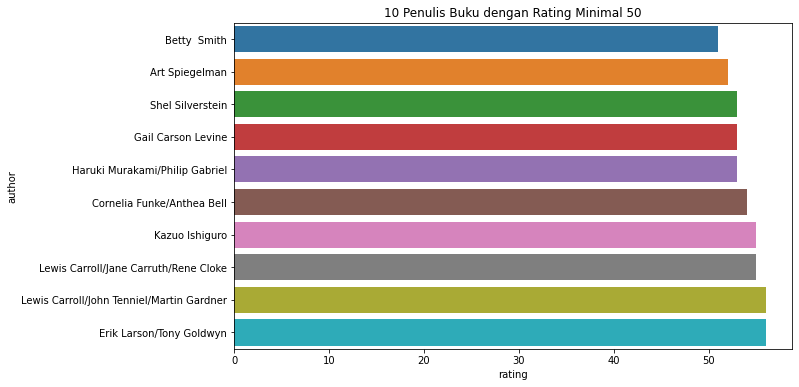

In [41]:
plt.figure(figsize=(10, 6))
plt.title('10 Penulis Buku dengan Rating Minimal 50')
sns.barplot(data=author_rating, x='rating', y='author')
plt.show()

10 Penulis Buku dengan Rating Minimal 50:
- Dengan jumlah nilai rating 51 ada Penulis buku bernama Betty Smith.

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Grafik batang sangat bagus namun disini kamu seharusnya mengidentifikasi penulis dengan peringkat buku rata-rata tertinggi dari buku dengan peringkat lebih dari 50. Silahkan pelajari query ini
    
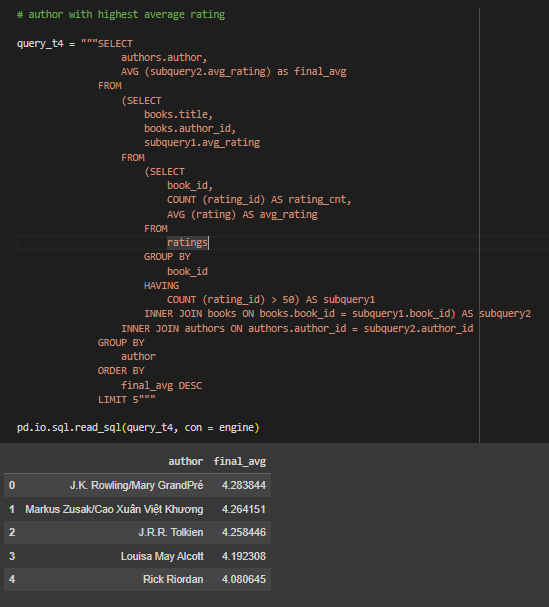
    
Jangan lupa untuk tampilkan data 10 teratas

</div>

### Hitung jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku.

Kita query berdasarkan books, reviews, dan ratings untuk di joinkan. Lalu kita iris nilainya berdasarkan jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku.

In [42]:
query = """
SELECT 
    reviews.username
    , COUNT(books.book_id) AS books
    , COUNT(DISTINCT reviews.text) AS text
    , SUM(ratings.rating) AS rating
FROM 
    books
    INNER JOIN reviews ON reviews.book_id = books.book_id
    INNER JOIN ratings ON ratings.book_id = books.book_id
GROUP BY reviews.username
HAVING COUNT(books.book_id) > 50
ORDER BY rating
LIMIT 10;"""

In [43]:
text_rating = pd.io.sql.read_sql(query, con = engine)
text_rating

,username,books,text,rating
0,wknight,62,18,238
1,brentpowers,65,17,246
2,ashleymalone,63,12,249
3,wsingleton,68,13,256
4,samuel96,66,11,259
5,znelson,68,12,265
6,nthomas,70,16,272
7,joe06,71,12,280
8,alison92,74,14,294
9,charlesraymond,78,16,306


In [44]:
text_rating['text'].mean()

14.1

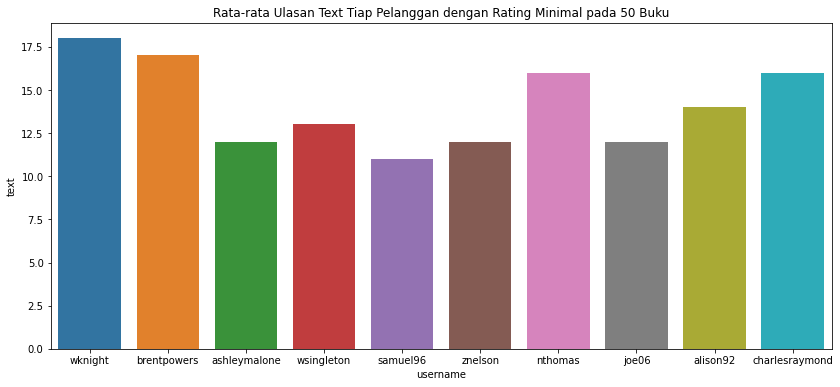

In [45]:
plt.figure(figsize=(14, 6))
plt.title('Rata-rata Ulasan Text Tiap Pelanggan dengan Rating Minimal pada 50 Buku')
sns.barplot(data=text_rating, x='username', y='text')
plt.show()

Reviews text:
- Sepertinya wknight merupakan pelanggan yang paling banyak memberikan ulasan dengan jumlah rata-rata di 18 ulasan.
- Pemberian reviews dan rating untuk 50 buku lebih ini merupakan pelanggan loyal dan perlu kita apresiasi.

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Jumlah rata-rata ulasan teks di antara pengguna yang memberi peringkat lebih dari 50 buku
    
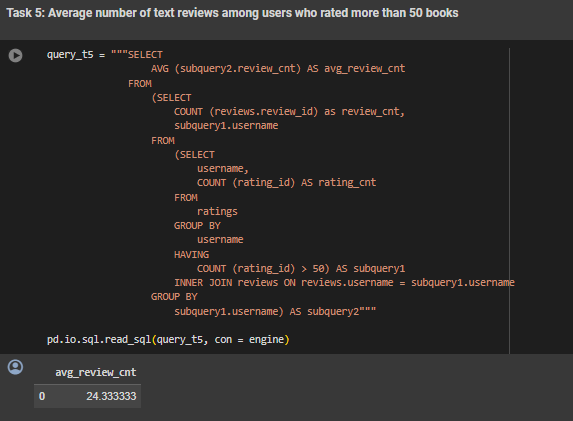

</div>

## Kesimpulan Umum

Kesimpulan secara menyeluruh berdasarkan poin-poin penting pada setiap tahap analisis.

Jumlah buku rilis:
- Terlihat paling banyak buku dirilis pada tahun 2000 - 2008, pada tahun 2005 dengan total rilis kisaran 270 buku.
- Tiba-tiba terjadi penurunan yang ekstrem setelah tahun 2008 hingga tahun 2020 

Jumlah ulasan:
- Secara keseluruhan nilai ulasan sebanyak 26167 dan rata-rata ratingnya adalah 3.9
- Setiap buku memiliki nilai ulasan yang beragam ada yang bernilai satuan hingga puluhan. Sedangkan pada nilai rata-ratanya rating perbedaannya tidak terpaut jauh untuk setiap bukunya. 

TOP 10 Penerbit Buku:
- Penguin Books merupakan penerbit paling banyak dengan berjumlahkan 42 terbitan
- Penerbit peringkat ke-10 ada  Delta dengan 13 terbitan buku

10 Penulis Buku dengan Rating Minimal 50:
- Dengan jumlah nilai rating 51 ada Penulis buku bernama Betty Smith.

Reviews text:
- Sepertinya wknight merupakan pelanggan yang paling banyak memberikan ulasan dengan jumlah rata-rata di 18 ulasan.
- Pemberian reviews dan rating untuk 50 buku lebih ini merupakan pelanggan loyal dan perlu kita apresiasi.

Melihat dari jumlah buku serta penerbitan yang cukup banyak ini mengindikasikan bahwa peminat daripada pelanggan terhadap membaca buku masih tetap tinggi. Dapat diperkuat asumsi yang kita miliki dengan menyimpulkan pada penilaian dari pelanggan juga masih positif atau baik dari nilai kuantitasnya.

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus! Sekarang jangan lupa perbaiki kesimpulan umum project ini

</div>